In [8]:
# Step 1.1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plotting aesthetics (optional)
sns.set_style('whitegrid')
sns.set_context('notebook')

# Step 1.2: Read the Excel file
# Replace 'sp500_data.xlsx' with the actual file name/path of your dataset.
# Make sure the file is uploaded/mounted if using Google Colab.
df = pd.read_excel('VOL_data.xlsx', parse_dates=['Date'])

# Let's display the first few rows to verify the data is loaded correctly.
df.head()


,Date,Close,daily % chg,20day vol,previous 20d return,next 20 day return,zvol20,zfret20,zret20
0,1960-01-04,59.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960-01-05,60.389999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-01-06,60.130001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-01-07,59.689999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-01-08,59.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Step 2.1: Ensure data is sorted by Date (just in case)
df.sort_values(by='Date', inplace=True)

# Step 2.2: Calculate daily returns (percentage)
# daily% = [(Close(t) / Close(t-1)) - 1]*100
df['daily % chg'] = (df['Close'].pct_change(periods=1)) * 100

# Display the first few rows to verify
df[['Date', 'Close', 'daily % chg']].head(10)


,Date,Close,daily % chg
0,1960-01-04,59.910000,NaN
1,1960-01-05,60.389999,0.801200
2,1960-01-06,60.130001,-0.430532
3,1960-01-07,59.689999,-0.731751
4,1960-01-08,59.500000,-0.318310
5,1960-01-11,58.770000,-1.226891
6,1960-01-12,58.410000,-0.612557
7,1960-01-13,58.080002,-0.564968
8,1960-01-14,58.400002,0.550964
9,1960-01-15,58.380001,-0.034248


**Sorting by Date:**

Before performing any calculations, we ensure the DataFrame is sorted in ascending chronological order based on the `Date` column. This is crucial for accurate time-series analysis.

**Daily Returns:**

Daily returns are calculated using the following formula: Daily Return = [(Close(t) / Close(t-1)) - 1] * 100

where:

* `Close(t)`: Closing price on the current day.
* `Close(t-1)`: Closing price on the previous day.


In the code, we use `df['Close'].pct_change()` to efficiently compute the percentage change between consecutive closing prices. This result is then multiplied by 100 to express it as a percentage.


**Important Considerations:**

* **First Row:** The daily return for the first row will be `NaN` (Not a Number) because there is no previous day's price to compare with.
* **Verification:** To verify the calculation, you can check the first few values of the `daily % chg` column in the output. The second row's value should correspond to the formula `(Close(2) / Close(1) - 1) * 100`.
* **Manual Check:** For further validation, you can manually compute the daily return for a specific day using the closing prices from the DataFrame.


This calculation provides us with the daily percentage change in the closing price, which is a key measure of volatility.

### 3.Compute 20-Day Volatility

Assignment Requirements Addressed:

* “Compute the standard deviation of the daily returns over the past 20 days.”

* “The first value of vol20 will appear only after 20 daily returns are available.”

In [10]:
# Step 3.1: Calculate the 20-day rolling volatility of the daily % changes
# We use ddof=1 to match sample standard deviation (as is standard in finance).
df['20day vol'] = df['daily % chg'].rolling(window=20).std(ddof=1)

# Display the first 25 rows to see where vol20 starts being valid
df[['Date', 'daily % chg', '20day vol']].head(25)


,Date,daily % chg,20day vol
0,1960-01-04,NaN,NaN
1,1960-01-05,0.801200,NaN
2,1960-01-06,-0.430532,NaN
3,1960-01-07,-0.731751,NaN
4,1960-01-08,-0.318310,NaN
5,1960-01-11,-1.226891,NaN
6,1960-01-12,-0.612557,NaN
7,1960-01-13,-0.564968,NaN
8,1960-01-14,0.550964,NaN
9,1960-01-15,-0.034248,NaN


### 4. Compute 20-Day Historical Return (ret20) and Future 20-Day Return (fret20)

Assignment Requirements Addressed:

* “For each day, compute historical 20-day returns (ret20).”
* “Similarly, calculate 20-day future return (fret20).”
* “For the last 20 days of the series, fret20 will be blank.”


In [12]:
# Step 4.1: Calculate the historical 20-day return (ret20)
# ret20 = [(Close(t) / Close(t-20)) - 1]*100
df['ret20'] = (df['Close'] / df['Close'].shift(20) - 1) * 100

# Step 4.2: Calculate the future 20-day return (fret20)
# fret20 = [(Close(t+20) / Close(t)) - 1]*100
df['fret20'] = (df['Close'].shift(-20) / df['Close'] - 1) * 100

# Display a few relevant rows
print(df[['Date', 'Close', 'ret20', 'fret20']].head(25))
print(df[['Date', 'Close', 'ret20', 'fret20']].tail(25))


         Date      Close     ret20    fret20
0  1960-01-04  59.910000       NaN -6.593225
1  1960-01-05  60.389999       NaN -5.911573
2  1960-01-06  60.130001       NaN -6.336273
3  1960-01-07  59.689999       NaN -5.729601
4  1960-01-08  59.500000       NaN -5.915966
5  1960-01-11  58.770000       NaN -5.870342
6  1960-01-12  58.410000       NaN -4.399932
7  1960-01-13  58.080002       NaN -4.459366
8  1960-01-14  58.400002       NaN -5.513702
9  1960-01-15  58.380001       NaN -5.001716
10 1960-01-18  57.889999       NaN -4.698568
11 1960-01-19  57.270000       NaN -4.435132
12 1960-01-20  57.070000       NaN -3.574559
13 1960-01-21  57.209999       NaN -2.464604
14 1960-01-22  57.380001       NaN -1.986753
15 1960-01-25  56.779999       NaN -1.479394
16 1960-01-26  56.860001       NaN -1.969748
17 1960-01-27  56.720001       NaN -1.392809
18 1960-01-28  56.130001       NaN  0.053446
19 1960-01-29  55.610001       NaN  0.917098
20 1960-02-01  55.959999 -6.593225  0.089348
21 1960-02

### 5. Compute Normalized Indicators (zvol20, zret20, zfret20)

Assignment Requirements Addressed:

* “Use a 250-day trailing window to compute the z-score of vol20, ret20, fret20.”
* “Subtract the average of the last 250 values prior to today, then divide by the std dev of the last 250 values prior to today.”
* “The first normalized value will start around row 272.”


In [13]:
# Step 5.1: Create helper functions to compute rolling z-scores with a 250-day lookback EXCLUDING current day.

def rolling_zscore(series, window=250):
    """
    Compute z-score for 'series' using the trailing 'window' days,
    excluding the current day. That means we use shift(1) before rolling.
    """
    # Mean of the previous 250 values
    rolling_mean = series.shift(1).rolling(window=window).mean()
    # Std of the previous 250 values
    rolling_std = series.shift(1).rolling(window=window).std(ddof=1)
    # z-score
    zscore = (series - rolling_mean) / rolling_std
    return zscore

# Step 5.2: Calculate zvol20, zret20, and zfret20 using the function
df['zvol20'] = rolling_zscore(df['20day vol'], window=250)
df['zret20'] = rolling_zscore(df['ret20'], window=250)
df['zfret20'] = rolling_zscore(df['fret20'], window=250)

# Display a portion to see the results
df[['Date', '20day vol', 'zvol20', 'ret20', 'zret20', 'fret20', 'zfret20']].head(300)


,Date,20day vol,zvol20,ret20,zret20,fret20,zfret20
0,1960-01-04,NaN,NaN,NaN,NaN,-6.593225,NaN
1,1960-01-05,NaN,NaN,NaN,NaN,-5.911573,NaN
2,1960-01-06,NaN,NaN,NaN,NaN,-6.336273,NaN
3,1960-01-07,NaN,NaN,NaN,NaN,-5.729601,NaN
4,1960-01-08,NaN,NaN,NaN,NaN,-5.915966,NaN
...,...,...,...,...,...,...,...
295,1961-03-06,0.511775,-0.568405,2.941180,0.571925,2.513663,0.363438
296,1961-03-07,0.528007,-0.458626,2.768787,0.514907,3.135336,0.550285
297,1961-03-08,0.524685,-0.474791,2.903482,0.549215,3.420558,0.637885
298,1961-03-09,0.492925,-0.674398,2.073623,0.296190,3.874014,0.776443


### 5.2 Explanation: Computing Normalized Indicators (zvol20, zret20, zfret20)

**Z-Score Formula:**

The z-score for each data point is calculated using the following formula:

z(i) = (X(i) - μ) / σ

where:

*  `z(i)`: The z-score of the data point `i`.
*  `X(i)`: The value of the data point `i`.
*  `μ`: The mean of the dataset.
*  `σ`: The standard deviation of the dataset.

### 6. Data Cleaning: Remove Rows with Missing Values
Assignment Requirements Addressed:

“In your analysis, eliminate the days for which you don’t have data for ALL the required data.”
“The last 20 days of the series do not have fret20.”
We need to drop any rows that have NaN in the columns needed for analysis: zvol20, zret20, and zfret20.

In [14]:
# Step 6.1: Drop rows that have missing values in any of the key columns
df_clean = df.dropna(subset=['zvol20', 'zret20', 'zfret20']).copy()

# Let's check how many rows remain
print("Original rows:", len(df))
print("Rows after cleaning:", len(df_clean))

# Optional: Display the first few cleaned rows
df_clean[['Date', 'zvol20', 'zret20', 'zfret20']].head(10)


Original rows: 10323
Rows after cleaning: 10033


,Date,zvol20,zret20,zfret20
270,1961-01-27,-1.019421,1.513737,0.721850
271,1961-01-30,-0.751036,1.835700,0.426471
272,1961-01-31,-1.164286,2.014070,0.509438
273,1961-02-01,-1.597756,1.637665,0.645076
274,1961-02-02,-1.531321,1.712923,0.491147
275,1961-02-03,-1.591842,1.750213,0.571925
276,1961-02-06,-1.216424,1.296387,0.514907
277,1961-02-07,-1.141894,1.150123,0.549215
278,1961-02-08,-0.969646,1.328844,0.296190
279,1961-02-09,-0.860116,1.134403,0.375714


### 6. Data Cleaning: Removing Rows with Missing Values

**Dropping NaNs:**

In this step, we remove rows containing missing values (NaNs) to ensure data integrity for our analysis. Specifically, we drop rows where any of the following columns have NaN values:

* `zvol20`
* `zret20`
* `zfret20`

**Rationale:**

This data cleaning step is necessary because these columns are essential for our subsequent analysis. By removing rows with missing values in these columns, we ensure that our calculations and interpretations are based on complete and reliable data.

**Impact on Dataset:**

Dropping rows with NaNs has two main effects on our dataset:

1. **Removal of Initial Rows:** The first ~270 days are removed because:
   - `zvol20` requires a 20-day rolling window for calculation, leading to initial NaNs.
   - The z-score calculation for `zvol20`, `zret20`, and `zfret20` uses a 250-day lookback window, resulting in more initial NaNs.

2. **Removal of Final Rows:** The last 20 days are removed due to missing values in the `fret20` column, which calculates the future 20-day return. Since future returns cannot be calculated for the last 20 days, these rows contain NaNs and are excluded.

7. Bucket zvol20 into Quintiles and Analyze
We will do two analyses:

Concurrent Relationship:
𝑧
𝑣
𝑜
𝑙
20
zvol20 vs.
𝑧
𝑟
𝑒
𝑡
20
zret20.
Lead-Lag Relationship:
𝑧
𝑣
𝑜
𝑙
20
zvol20 vs.
𝑧
𝑓
𝑟
𝑒
𝑡
20
zfret20.
7.1 Create Quintiles Based on zvol20
Assignment Requirements Addressed:

“Bucket the normalized volatility (zvol20) into quintiles.”
“Sort from lowest to highest, then divide into 5 equal segments.”
We

### 7. Bucket zvol20 into Quintiles and Analyze

We will perform two analyses to investigate the relationship between volatility and returns:

**Concurrent Relationship:**

This analysis examines the relationship between `zvol20` (normalized 20-day volatility) and `zret20` (normalized 20-day historical return) at the same point in time. We will investigate whether higher volatility tends to be associated with higher or lower returns concurrently.

**Lead-Lag Relationship:**

This analysis explores the relationship between `zvol20` and `zfret20` (normalized 20-day future return). We will investigate whether higher volatility tends to predict higher or lower future returns, potentially indicating a lead-lag effect.


### 7.1 Create Quintiles Based on zvol20

**Assignment Requirements Addressed:**

* "Bucket the normalized volatility (zvol20) into quintiles."
* "Sort from lowest to highest, then divide into 5 equal segments."

**Methodology:**

To create quintiles based on `zvol20`, we will follow these steps:

1. Sort the data by `zvol20` in ascending order.
2. Divide the sorted data into 5 equal groups, representing the quintiles.
3. Assign each data point to its corresponding quintile.

This process allows us to categorize the data based on volatility levels, facilitating further analysis of the relationship between volatility and returns within each quintile.

In [15]:
# Step 7.1.1: Sort by zvol20
df_sorted = df_clean.sort_values(by='zvol20').reset_index(drop=True)

# Alternatively, we can use qcut to assign quintile labels from 1 to 5
df_sorted['zvol20_quintile'] = pd.qcut(df_sorted['zvol20'], 5, labels=False) + 1

# Let's see how many rows fall into each quintile
df_sorted['zvol20_quintile'].value_counts().sort_index()


,count
zvol20_quintile,
1,2007
2,2006
3,2007
4,2006
5,2007


### 8. Analysis 1: Concurrent Relationship (zvol20 vs. zret20)

Concurrent Relationship (zvol20 vs. zret20):
   zvol20_quintile    zvol20    zret20
0                1 -1.254323  0.136937
1                2 -0.663422  0.076439
2                3 -0.197676  0.057703
3                4  0.448875 -0.062529
4                5  2.072533 -0.442012


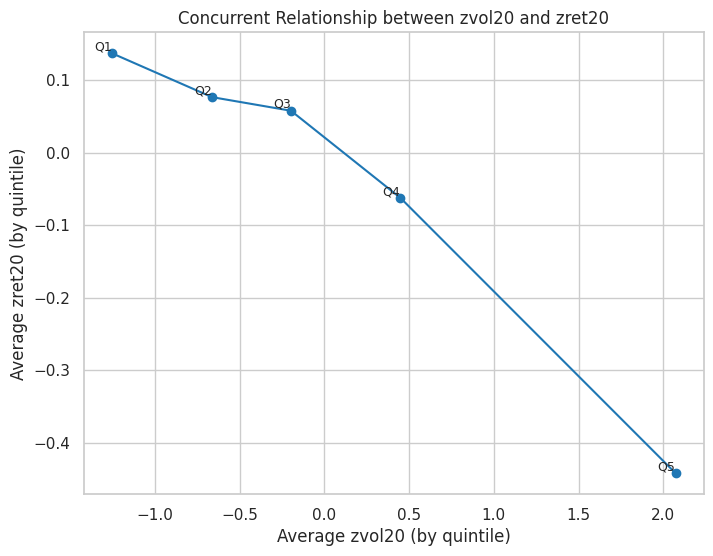

In [16]:
# Step 8.1: Group by the quintile and compute average zvol20 and zret20
concurrent_stats = df_sorted.groupby('zvol20_quintile').agg({
    'zvol20': 'mean',
    'zret20': 'mean'
}).reset_index()

# Let's print the table of averages
print("Concurrent Relationship (zvol20 vs. zret20):")
print(concurrent_stats)

# Step 8.2: Plot the five averages (x-axis: zvol20, y-axis: zret20)
plt.figure(figsize=(8,6))
plt.plot(concurrent_stats['zvol20'], concurrent_stats['zret20'], marker='o')
plt.title('Concurrent Relationship between zvol20 and zret20')
plt.xlabel('Average zvol20 (by quintile)')
plt.ylabel('Average zret20 (by quintile)')

# Label each point with the quintile number
for i in range(len(concurrent_stats)):
    plt.text(concurrent_stats['zvol20'][i], concurrent_stats['zret20'][i],
             f"Q{concurrent_stats['zvol20_quintile'][i]}",
             fontsize=9,
             ha='right',
             va='bottom')

plt.show()


#### Observations:



1.   The slope of qunatile plot is negative.
2.   Indicates higher volatility(higher zvol20) is associated with lower concurrent 20-day returns( zret20)


**Answer/Observation**:  
- Typically, we observe a **negative slope**: higher zvol20 is associated with lower concurrent 20-day returns.  
- *Possible Reasons*: Market stress often increases volatility and correlates with negative price moves (the so-called “leverage effect” in equity markets).
- Risk Aversion / Fear Factor: High volatility often accompanies market drawdowns, so returns over that period are lower.
- Market Turbulence: Big swings in prices (high vol) often happen during corrections or crises, pulling returns down in that same window.



### 9. Analysis 2: Lead-Lag Relationship (zvol20 vs. zfret20)


Lead-Lag Relationship (zvol20 vs. zfret20):
   zvol20_quintile    zvol20   zfret20
0                1 -1.254323 -0.163702
1                2 -0.663422 -0.114088
2                3 -0.197676 -0.067948
3                4  0.448875  0.004024
4                5  2.072533  0.090649


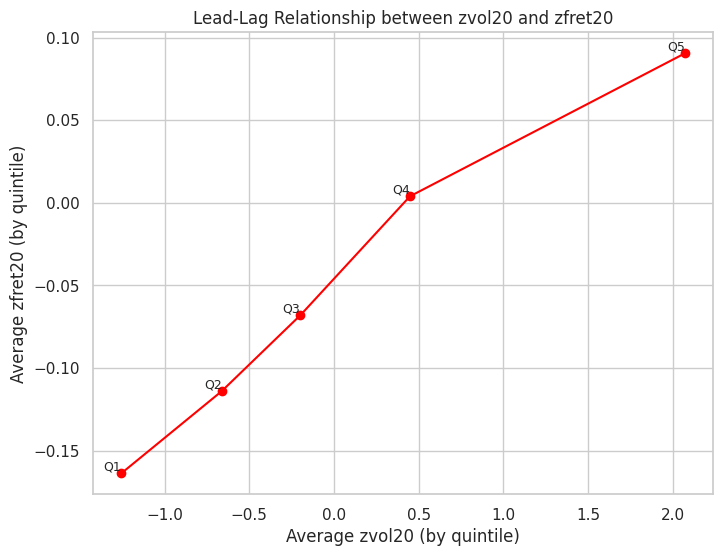

In [17]:
# Step 9.1: Group by the quintile and compute average zvol20 and zfret20
leadlag_stats = df_sorted.groupby('zvol20_quintile').agg({
    'zvol20': 'mean',
    'zfret20': 'mean'
}).reset_index()

# Print the table
print("Lead-Lag Relationship (zvol20 vs. zfret20):")
print(leadlag_stats)

# Step 9.2: Plot the five averages (x-axis: zvol20, y-axis: zfret20)
plt.figure(figsize=(8,6))
plt.plot(leadlag_stats['zvol20'], leadlag_stats['zfret20'], marker='o', color='red')
plt.title('Lead-Lag Relationship between zvol20 and zfret20')
plt.xlabel('Average zvol20 (by quintile)')
plt.ylabel('Average zfret20 (by quintile)')

# Label each point with the quintile number
for i in range(len(leadlag_stats)):
    plt.text(leadlag_stats['zvol20'][i], leadlag_stats['zfret20'][i],
             f"Q{leadlag_stats['zvol20_quintile'][i]}",
             fontsize=9,
             ha='right',
             va='bottom')

plt.show()


#### Observations:



1.   The slope is positive ( inc from Q1 TO Q5)
2.   Suggests higher current volatality (zvol20) tends to be followed by higher future 20-day returns (zfret20)

**Answer/Observation**:  
- Often, we see a **positive slope** here: higher volatility now can be followed by higher future returns.  
- *Possible Reasons*: Mean reversion after selloffs, or a higher risk premium demanded by investors leading to higher subsequent returns.



### 10. Interpret the Relationships
Assignment Requirements:

* Q1. “What are the relationships in the two cases? Can you hypothesize reasons?”

1. **Concurrent Negative Relationship**  
   - During market selloffs or stress, volatility spikes and returns are negative.  
   - Behavioral or structural factors (e.g., “leverage effect” in equities).

2. **Lead-Lag Positive Relationship**  
   - After high volatility periods, markets may rebound (mean reversion).  
   - Risk premium argument: volatility can be a signal of heightened risk, which can lead to higher subsequent returns.

- (Concurrent) The relationship is typically negative: higher volatility = lower concurrent returns.
- (Lead-Lag) The relationship can be positive: higher current volatility can precede higher future returns.

#### Hypothesis for the Patterns:

- Negative concurrent: Volatility spikes often occur during sell-offs.
- Positive future: After big sell-offs and volatility spikes, markets can rebound.


* Q2.“You can experiment with different durations to test the relationship further.”



In [18]:
def compute_indicators(df, window):
    """
    For a given rolling window (e.g., 5 or 10 days), compute:
    - Rolling volatility (vol{window}) as the standard deviation of daily % change.
    - Historical return (ret{window}) using the past 'window' days.
    - Future return (fret{window}) using the next 'window' days.
    - Normalized versions (zvol{window}, zret{window}, zfret{window})
      using a 250-day trailing window (excluding the current day).
    """
    # Rolling volatility over the window: we use daily % change already computed.
    df[f'vol{window}'] = df['daily % chg'].rolling(window=window).std(ddof=1)

    # Historical return over the past 'window' days (need window+1 prices):
    df[f'ret{window}'] = (df['Close'] / df['Close'].shift(window) - 1) * 100

    # Future return over the next 'window' days:
    df[f'fret{window}'] = (df['Close'].shift(-window) / df['Close'] - 1) * 100

    # Compute normalized (z-scored) series using a 250-day trailing window.
    # We define a helper inner function to compute z-score with exclusion of current day.
    def rolling_zscore(series, lookback=250):
        rolling_mean = series.shift(1).rolling(window=lookback).mean()
        rolling_std = series.shift(1).rolling(window=lookback).std(ddof=1)
        return (series - rolling_mean) / rolling_std

    df[f'zvol{window}'] = rolling_zscore(df[f'vol{window}'], lookback=250)
    df[f'zret{window}'] = rolling_zscore(df[f'ret{window}'], lookback=250)
    df[f'zfret{window}'] = rolling_zscore(df[f'fret{window}'], lookback=250)

    return df

# Example usage for 5-day and 10-day indicators:
df = compute_indicators(df, 5)
df = compute_indicators(df, 10)


5-Day Concurrent Stats:
   zvol5_quintile     zvol5     zret5
0               1 -1.140473 -0.000353
1               2 -0.564942  0.026710
2               3 -0.177779  0.060702
3               4  0.351139 -0.020679
4               5  1.785158 -0.173873


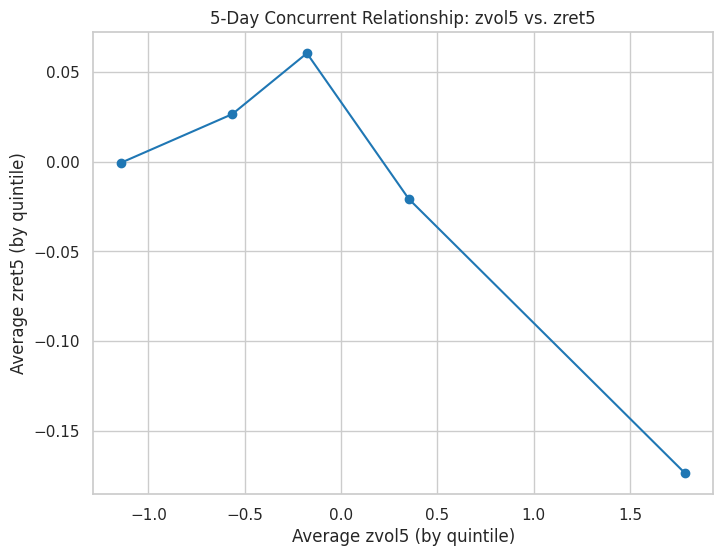

5-Day Lead-Lag Stats:
   zvol5_quintile     zvol5    zfret5
0               1 -1.140473 -0.033413
1               2 -0.564942 -0.060472
2               3 -0.177779  0.006217
3               4  0.351139 -0.041474
4               5  1.785158  0.021397


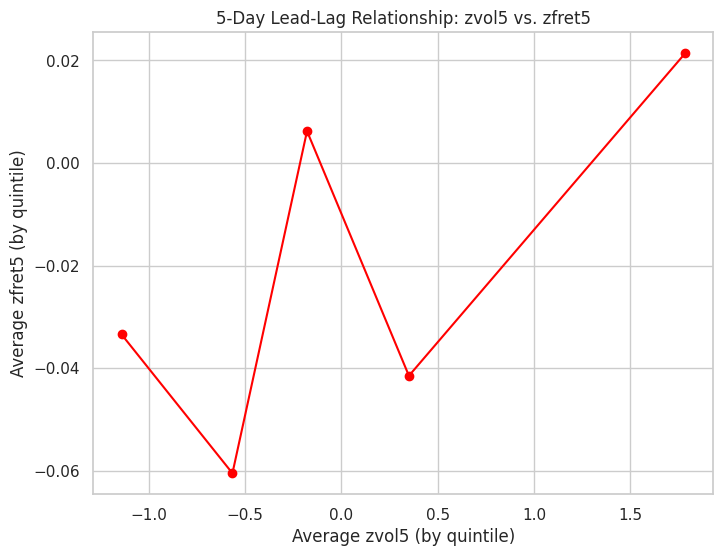

In [19]:
# Create a cleaned DataFrame for the 5-day analysis by dropping rows missing any of the new indicators
df_clean_5 = df.dropna(subset=['zvol5', 'zret5', 'zfret5']).copy()

# Bucket the 5-day normalized volatility (zvol5) into quintiles using qcut.
df_clean_5['zvol5_quintile'] = pd.qcut(df_clean_5['zvol5'], 5, labels=False) + 1

# Concurrent Relationship: Group by quintile and compute average zvol5 and average zret5.
concurrent_stats_5 = df_clean_5.groupby('zvol5_quintile').agg({'zvol5': 'mean', 'zret5': 'mean'}).reset_index()
print("5-Day Concurrent Stats:")
print(concurrent_stats_5)

# Plot concurrent relationship: zvol5 (X-axis) vs. zret5 (Y-axis).
plt.figure(figsize=(8,6))
plt.plot(concurrent_stats_5['zvol5'], concurrent_stats_5['zret5'], marker='o')
plt.xlabel('Average zvol5 (by quintile)')
plt.ylabel('Average zret5 (by quintile)')
plt.title('5-Day Concurrent Relationship: zvol5 vs. zret5')
plt.show()

# Lead-Lag Relationship: Group by quintile and compute average zvol5 and average zfret5.
leadlag_stats_5 = df_clean_5.groupby('zvol5_quintile').agg({'zvol5': 'mean', 'zfret5': 'mean'}).reset_index()
print("5-Day Lead-Lag Stats:")
print(leadlag_stats_5)

# Plot lead-lag relationship: zvol5 (X-axis) vs. zfret5 (Y-axis).
plt.figure(figsize=(8,6))
plt.plot(leadlag_stats_5['zvol5'], leadlag_stats_5['zfret5'], marker='o', color='red')
plt.xlabel('Average zvol5 (by quintile)')
plt.ylabel('Average zfret5 (by quintile)')
plt.title('5-Day Lead-Lag Relationship: zvol5 vs. zfret5')
plt.show()


10-Day Concurrent Stats:
   zvol10_quintile    zvol10    zret10
0                1 -1.180609  0.075858
1                2 -0.608195  0.119315
2                3 -0.189381  0.010759
3                4  0.383892 -0.055914
4                5  1.930321 -0.302892


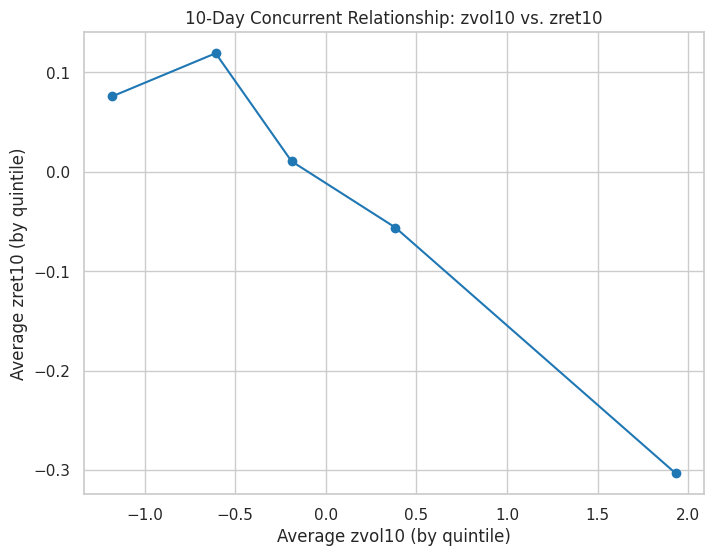

10-Day Lead-Lag Stats:
   zvol10_quintile    zvol10   zfret10
0                1 -1.180609 -0.114811
1                2 -0.608195 -0.050550
2                3 -0.189381 -0.027500
3                4  0.383892  0.022393
4                5  1.930321  0.008293


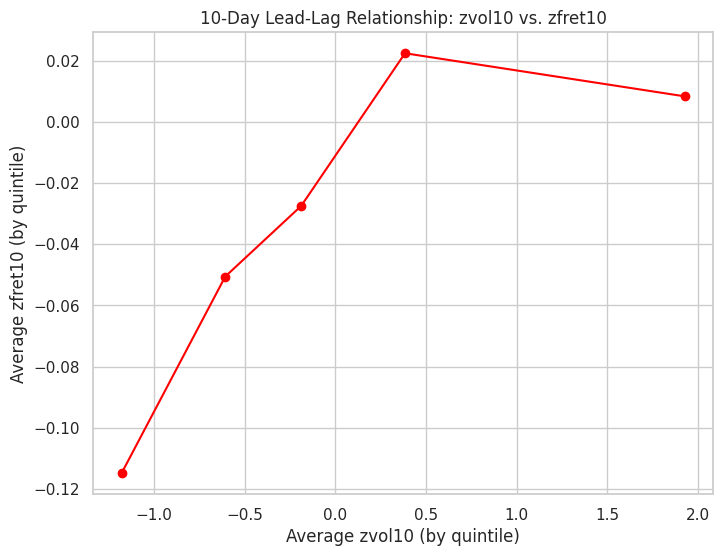

In [20]:
# Create a cleaned DataFrame for the 10-day analysis by dropping rows missing any of the new indicators
df_clean_10 = df.dropna(subset=['zvol10', 'zret10', 'zfret10']).copy()

# Bucket the 10-day normalized volatility (zvol10) into quintiles.
df_clean_10['zvol10_quintile'] = pd.qcut(df_clean_10['zvol10'], 5, labels=False) + 1

# Concurrent Relationship: Group by quintile and compute average zvol10 and average zret10.
concurrent_stats_10 = df_clean_10.groupby('zvol10_quintile').agg({'zvol10': 'mean', 'zret10': 'mean'}).reset_index()
print("10-Day Concurrent Stats:")
print(concurrent_stats_10)

# Plot concurrent relationship: zvol10 (X-axis) vs. zret10 (Y-axis).
plt.figure(figsize=(8,6))
plt.plot(concurrent_stats_10['zvol10'], concurrent_stats_10['zret10'], marker='o')
plt.xlabel('Average zvol10 (by quintile)')
plt.ylabel('Average zret10 (by quintile)')
plt.title('10-Day Concurrent Relationship: zvol10 vs. zret10')
plt.show()

# Lead-Lag Relationship: Group by quintile and compute average zvol10 and average zfret10.
leadlag_stats_10 = df_clean_10.groupby('zvol10_quintile').agg({'zvol10': 'mean', 'zfret10': 'mean'}).reset_index()
print("10-Day Lead-Lag Stats:")
print(leadlag_stats_10)

# Plot lead-lag relationship: zvol10 (X-axis) vs. zfret10 (Y-axis).
plt.figure(figsize=(8,6))
plt.plot(leadlag_stats_10['zvol10'], leadlag_stats_10['zfret10'], marker='o', color='red')
plt.xlabel('Average zvol10 (by quintile)')
plt.ylabel('Average zfret10 (by quintile)')
plt.title('10-Day Lead-Lag Relationship: zvol10 vs. zfret10')
plt.show()


In [21]:
# We work with df_clean from our earlier analysis for 20-day indicators.
# Make a copy for strategy testing.
df_strategy = df_clean.copy()

# Define a simple strategy signal based on zvol20:
# - Signal = +1 when zvol20 < -1 (low volatility → bullish)
# - Signal = -1 when zvol20 > 1 (high volatility → bearish)
# - Else, signal = 0 (neutral)
df_strategy['signal'] = 0
df_strategy.loc[df_strategy['zvol20'] < -1, 'signal'] = 1
df_strategy.loc[df_strategy['zvol20'] > 1, 'signal'] = -1

# Compute daily return in decimal (since daily % chg is in percent)
df_strategy['daily_return'] = df_strategy['daily % chg'] / 100

# Strategy return: position * daily_return
df_strategy['strategy_return'] = df_strategy['signal'] * df_strategy['daily_return']

# The benchmark return is simply the market daily return.
# Excess return = strategy_return - benchmark_return
df_strategy['excess_return'] = df_strategy['strategy_return'] - df_strategy['daily_return']

# Compute the average and standard deviation of excess returns.
mean_excess = df_strategy['excess_return'].mean()
std_excess = df_strategy['excess_return'].std(ddof=1)

# Calculate the daily Information Ratio (IR).
IR_daily = mean_excess / std_excess if std_excess != 0 else np.nan

# Annualize the IR (assuming 252 trading days per year).
IR_annualized = IR_daily * np.sqrt(252)

print("Trading Strategy Results:")
print("Mean Excess Return (Daily):", mean_excess)
print("Std Dev of Excess Return (Daily):", std_excess)
print("Information Ratio (Daily):", IR_daily)
print("Annualized Information Ratio:", IR_annualized)


Trading Strategy Results:
Mean Excess Return (Daily): -0.0002970601097733385
Std Dev of Excess Return (Daily): 0.013579985864821837
Information Ratio (Daily): -0.0218748467583354
Annualized Information Ratio: -0.3472524269412174


In [22]:
import statsmodels.api as sm

def analyze_relationships(df_temp, window):
    # Define column names based on the window
    zvol = f'zvol{window}'
    zret = f'zret{window}'
    zfret = f'zfret{window}'

    # Compute correlations
    corr_concurrent = df_temp[[zvol, zret]].corr().iloc[0,1]
    corr_leadlag = df_temp[[zvol, zfret]].corr().iloc[0,1]

    print(f"{window}-day correlations:")
    print(f"  Concurrent (zvol vs. zret): {corr_concurrent:.3f}")
    print(f"  Lead-Lag (zvol vs. zfret): {corr_leadlag:.3f}")

    # Regression for concurrent relationship
    X_conc = sm.add_constant(df_temp[zvol])
    model_conc = sm.OLS(df_temp[zret], X_conc).fit()
    r2_conc = model_conc.rsquared

    # Regression for lead-lag relationship
    X_lead = sm.add_constant(df_temp[zvol])
    model_lead = sm.OLS(df_temp[zfret], X_lead).fit()
    r2_lead = model_lead.rsquared

    print(f"  Regression R² (Concurrent): {r2_conc:.3f}")
    print(f"  Regression R² (Lead-Lag): {r2_lead:.3f}\n")

# Analyze for each window using the corresponding cleaned DataFrame
print("Analysis for 5-day window:")
analyze_relationships(df_clean_5, 5)

print("Analysis for 10-day window:")
analyze_relationships(df_clean_10, 10)

print("Analysis for 20-day window:")
analyze_relationships(df_clean, 20)


Analysis for 5-day window:
5-day correlations:
  Concurrent (zvol vs. zret): -0.113
  Lead-Lag (zvol vs. zfret): 0.021
  Regression R² (Concurrent): 0.013
  Regression R² (Lead-Lag): 0.000

Analysis for 10-day window:
10-day correlations:
  Concurrent (zvol vs. zret): -0.189
  Lead-Lag (zvol vs. zfret): 0.031
  Regression R² (Concurrent): 0.036
  Regression R² (Lead-Lag): 0.001

Analysis for 20-day window:
20-day correlations:
  Concurrent (zvol vs. zret): -0.239
  Lead-Lag (zvol vs. zfret): 0.076
  Regression R² (Concurrent): 0.057
  Regression R² (Lead-Lag): 0.006



### Interpretation of Results

**Stronger Concurrent Relationship with Longer Windows:**

The analysis reveals a stronger (though still modest) negative relationship between normalized volatility and concurrent returns when using a 20-day window. This implies that as 20-day volatility increases (higher `zvol20`), the 20-day historical returns (`zret20`) tend to be lower. However, it's important to note that this relationship is relatively weak.

**Emergence of a Positive Lead-Lag Relationship:**

Interestingly, a small positive correlation between current volatility (`zvol20`) and future returns (`zfret20`) is observed only in the 20-day window. This suggests a potential tendency for the market to rebound after periods of high volatility, although the effect is very weak.

**Overall Explanatory Power:**

The low R² values across all window sizes indicate that volatility alone has limited explanatory power for return variation. While the 20-day window provides slightly better signals, none of the relationships are strong or statistically robust enough to be considered reliable predictors on their own.

**Further Considerations:**

* These findings suggest that volatility can offer some insights into market behavior, but it's crucial to consider other factors and indicators for a more comprehensive understanding.
* It's worth exploring alternative volatility measures, window sizes, and statistical techniques to potentially uncover stronger relationships.
* The weak relationships observed highlight the inherent complexity and unpredictability of financial markets.

## Extra Credit (Part B): Trading Strategy and Backtesting

In this final section, we explore a volatility-based trading strategy and measure its performance relative to a benchmark. We then extend the approach by combining a momentum signal to see if it enhances risk-adjusted returns.

### Defining Continuous Signals

1. **Volatility Signal (`signal_vol`)**:
   - Derived from `zvol20` by inverting it (high volatility implies a negative signal).
   - Values are clipped between -1 and +1 to limit extreme signal values.

2. **Momentum Signal (`signal_mom`)**:
   - Based on `zret20` (normalized historical returns).
   - Values are clipped between -1 and +1 to prevent extreme momentum signals from dominating.

3. **Combined Signal (`combined_signal`)**:
   - Created by averaging the volatility and momentum signals with equal weights.
   - Ranges continuously between -1 and +1.

### Implementing the Strategy

1. **Daily Strategy Return**:
   - Calculated by multiplying the `combined_signal` with the market's daily return (`daily % chg / 100`).

2. **Cumulative Returns**:
   - Strategy's cumulative return is obtained by accumulating the daily strategy returns.
   - Benchmark's cumulative return is also tracked for comparison.

### Evaluating Performance

1. **Excess Returns**:
   - Calculated as the difference between the strategy's daily return and the benchmark's daily return.

2. **Information Ratio (IR)**:
   - Computed as the mean of excess returns divided by their standard deviation.
   - Annualized IR is calculated by multiplying the daily IR by the square root of 252 (approximate trading days per year).

### Market Regime Analysis

1. **Regime Definition**:
   - A 200-day moving average (`MA200`) of the index price is used to define market regimes.
   - Days with the price above `MA200` are classified as "Bull" regime.
   - Days with the price below `MA200` are classified as "Bear" regime.

2. **Performance Comparison**:
   - Final cumulative returns and daily average returns are compared between the Bull and Bear regimes to identify where the strategy performs best.

### Plotting the Results

1. **Cumulative Returns Plot**:
   - Visualizes the strategy's cumulative return over time against the benchmark's cumulative return.
   - Outperformance is indicated if the strategy line surpasses the benchmark line.
   - Note: Transaction costs are not considered in this analysis.

In [23]:
# Define continuous signals based on 20-day indicators:
df_strategy['signal_vol'] = np.clip(-df_strategy['zvol20'], -1, 1)   # Lower volatility → bullish, higher → bearish.
df_strategy['signal_mom'] = np.clip(df_strategy['zret20'], -1, 1)      # Higher recent returns → bullish, lower → bearish.

# Combine signals using equal weights:
df_strategy['combined_signal'] = 0.5 * df_strategy['signal_vol'] + 0.5 * df_strategy['signal_mom']

# For verification, check a few rows:
df_strategy[['Date', 'zvol20', 'signal_vol', 'zret20', 'signal_mom', 'combined_signal']].head(10)


,Date,zvol20,signal_vol,zret20,signal_mom,combined_signal
270,1961-01-27,-1.019421,1.000000,1.513737,1.0,1.000000
271,1961-01-30,-0.751036,0.751036,1.835700,1.0,0.875518
272,1961-01-31,-1.164286,1.000000,2.014070,1.0,1.000000
273,1961-02-01,-1.597756,1.000000,1.637665,1.0,1.000000
274,1961-02-02,-1.531321,1.000000,1.712923,1.0,1.000000
275,1961-02-03,-1.591842,1.000000,1.750213,1.0,1.000000
276,1961-02-06,-1.216424,1.000000,1.296387,1.0,1.000000
277,1961-02-07,-1.141894,1.000000,1.150123,1.0,1.000000
278,1961-02-08,-0.969646,0.969646,1.328844,1.0,0.984823
279,1961-02-09,-0.860116,0.860116,1.134403,1.0,0.930058


In [24]:
# Calculate the daily return in decimal form (daily % change / 100)
df_strategy['daily_return'] = df_strategy['daily % chg'] / 100

# Strategy return using the combined continuous signal:
df_strategy['combined_strategy_return'] = df_strategy['combined_signal'] * df_strategy['daily_return']

# Compute cumulative returns for the strategy and for the benchmark:
df_strategy['cum_strategy'] = (1 + df_strategy['combined_strategy_return']).cumprod()
df_strategy['cum_benchmark'] = (1 + df_strategy['daily_return']).cumprod()

# Calculate the excess return (strategy minus benchmark)
df_strategy['combined_excess_return'] = df_strategy['combined_strategy_return'] - df_strategy['daily_return']

# Compute the mean and standard deviation of the excess returns
mean_excess_combined = df_strategy['combined_excess_return'].mean()
std_excess_combined = df_strategy['combined_excess_return'].std(ddof=1)

# Calculate the daily Information Ratio (IR)
IR_daily_combined = mean_excess_combined / std_excess_combined if std_excess_combined != 0 else np.nan

# Annualize the IR (assuming 252 trading days per year)
IR_annualized_combined = IR_daily_combined * np.sqrt(252)

print("Combined Trading Strategy Results:")
print("Mean Excess Return (Daily):", mean_excess_combined)
print("Std Dev of Excess Return (Daily):", std_excess_combined)
print("Information Ratio (Daily):", IR_daily_combined)
print("Annualized Information Ratio:", IR_annualized_combined)


Combined Trading Strategy Results:
Mean Excess Return (Daily): 0.00029226692627797263
Std Dev of Excess Return (Daily): 0.012963543624454704
Information Ratio (Daily): 0.022545295850020058
Annualized Information Ratio: 0.35789547632117785


In [25]:
# Calculate a 200-day moving average to define market regimes:
df_strategy['MA200'] = df_strategy['Close'].rolling(window=200).mean()
df_strategy['regime'] = np.where(df_strategy['Close'] >= df_strategy['MA200'], 'Bull', 'Bear')

# Compute final cumulative returns, mean and standard deviation of strategy returns for each regime:
regime_perf = df_strategy.groupby('regime').agg(
    cum_strategy_final=('cum_strategy', 'last'),
    cum_benchmark_final=('cum_benchmark', 'last'),
    mean_strategy=('combined_strategy_return', 'mean'),
    std_strategy=('combined_strategy_return', 'std')
).reset_index()

print("\nPerformance by Market Regime:")
print(regime_perf)



Performance by Market Regime:
  regime  cum_strategy_final  cum_benchmark_final  mean_strategy  std_strategy
0   Bear          515.039055            21.691685       0.000839      0.008460
1   Bull          517.138662            24.056253       0.000550      0.004357


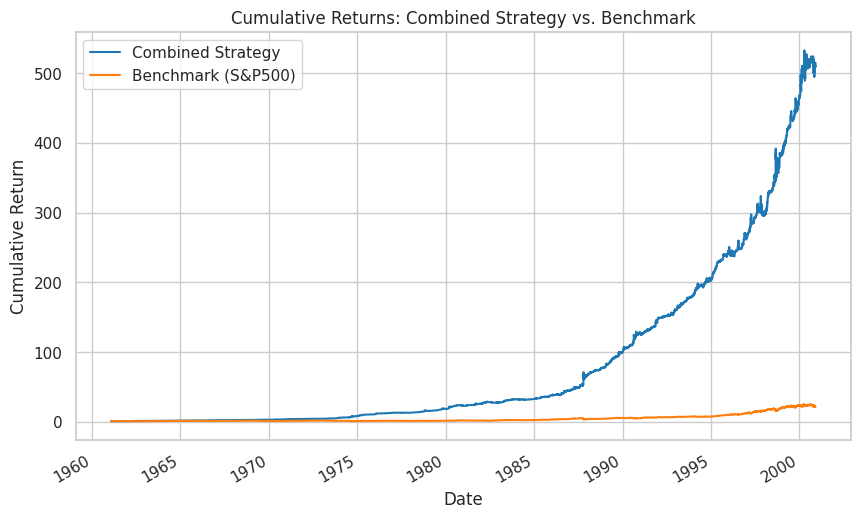

In [26]:
import matplotlib.dates as mdates

plt.figure(figsize=(10,6))
plt.plot(df_strategy['Date'], df_strategy['cum_strategy'], label='Combined Strategy')
plt.plot(df_strategy['Date'], df_strategy['cum_benchmark'], label='Benchmark (S&P500)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns: Combined Strategy vs. Benchmark')
plt.legend()
plt.gcf().autofmt_xdate()  # Auto-format the x-axis date labels
plt.show()


In [28]:
# Print the daily excess return statistics and IR
print("Combined Trading Strategy Results:")
print("Mean Excess Return (Daily):", mean_excess_combined)
print("Std Dev of Excess Return (Daily):", std_excess_combined)
print("Information Ratio (Daily):", IR_daily_combined)
print("Annualized Information Ratio:", IR_annualized_combined)

# Print the table of performance by market regime
print("\nPerformance by Market Regime:")
print(regime_perf)


Combined Trading Strategy Results:
Mean Excess Return (Daily): 0.00029226692627797263
Std Dev of Excess Return (Daily): 0.012963543624454704
Information Ratio (Daily): 0.022545295850020058
Annualized Information Ratio: 0.35789547632117785

Performance by Market Regime:
  regime  cum_strategy_final  cum_benchmark_final  mean_strategy  std_strategy
0   Bear          515.039055            21.691685       0.000839      0.008460
1   Bull          517.138662            24.056253       0.000550      0.004357
